In [1]:
import re
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('C:/Users/keith/Desktop/Thinkful/IBM_HR_Analytics.csv')
pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


count    170.000000
mean      32.264706
std        5.182520
min       24.000000
25%       29.000000
50%       31.000000
75%       35.000000
max       44.000000
Name: Age, dtype: float64


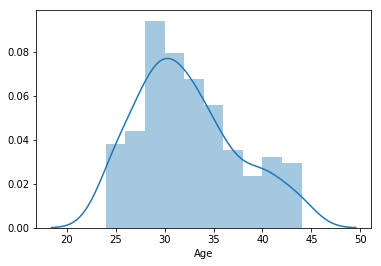

In [29]:
attr_yes = df[df['Attrition']=='Yes'] 
print(attr_yes.Age.describe())
sns.distplot(attr_yes.Age)
plt.show()

In [21]:
df = df[(df['Age'] >= 24) & (df['Age'] <= 44)].sort_values(by='Age') # Limits data fram to the age range with most attrition.

In [ ]:
OverTime = {'Yes': 1,'No': 0} 
df.OverTime = [OverTime[item] for item in df.OverTime] # Converted OverTime column to a countable variable.

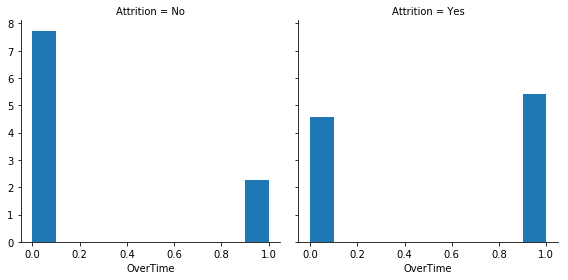

In [74]:
g = sns.FacetGrid(df, col="Attrition",height=4)
g.map(plt.hist,"OverTime",normed=True);
plt.show()

In [45]:

ay = df[df['Attrition']=='Yes']
an = df[df['Attrition']=='No']
a = ay['OverTime'] 
b = an['OverTime']
stats.ttest_ind(a, b,equal_var=True)

Ttest_indResult(statistic=8.68141235427872, pvalue=1.4154871190284262e-17)

In [46]:
a = df.groupby(['Attrition','OverTime']).JobSatisfaction.describe()
print(a)

                    count      mean       std  min   25%  50%  75%  max
Attrition OverTime                                                     
No        0         707.0  2.760962  1.082047  1.0  2.00  3.0  4.0  4.0
          1         208.0  2.947115  1.112985  1.0  2.00  3.0  4.0  4.0
Yes       0          78.0  2.166667  1.086119  1.0  1.00  2.0  3.0  4.0
          1          92.0  2.586957  1.130517  1.0  1.75  3.0  4.0  4.0


In [5]:
a = df.groupby(['Attrition','OverTime']).JobSatisfaction.describe()
print(a)

                    count      mean       std  min   25%  50%  75%  max
Attrition OverTime                                                     
No        0         707.0  2.760962  1.082047  1.0  2.00  3.0  4.0  4.0
          1         208.0  2.947115  1.112985  1.0  2.00  3.0  4.0  4.0
Yes       0          78.0  2.166667  1.086119  1.0  1.00  2.0  3.0  4.0
          1          92.0  2.586957  1.130517  1.0  1.75  3.0  4.0  4.0
